# Introduction

 In this project, we are going to deal with the health insurance price of customers based on the collected data of customers. Nowadays people are more likely to invest on any of the health insurance policies to use them in case of any medical emergencies. Also, there are many insurance companies emerging at a good rate. This project is to mainly concentrate on the data samples of customers which would affect their insurance price.





 * In this project, our main aim is to identify the variables which will help in predicting the health insurance price using a machine learning model.

In [195]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import plotly.express as px
import seaborn as sns

# Loading the dataset

In [196]:
# loading the dataset

dataset_raw = pd.read_excel('Health_insurance_cost.xlsx')

In [197]:
dataset = dataset_raw.copy()

# Basic EDA

In [ ]:
# shape of the dataset

dataset.shape

(1338, 7)

 * The dataset has **1338** entries(rows) and **7** variables(columns)

In [ ]:
# exploring the datatypes of the columns

dataset.dtypes

age                       float64
gender                     object
BMI                       float64
Children                    int64
smoking_status             object
location                   object
health_insurance_price    float64
dtype: object

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


 * Here we can see that there are **3** float variables, **1** integer variable and **3** object variables

In [ ]:
dataset.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


  * From this, we can clearly see that **BMI** column has null values

In [ ]:
dataset.tail()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
1333,50.0,male,30.97,3,no,northwest,10600.5483
1334,18.0,female,31.92,0,no,northeast,2205.9808
1335,18.0,female,36.85,0,no,southeast,1629.8335
1336,21.0,female,25.80,0,no,southwest,2007.9450
1337,61.0,female,29.07,0,yes,northwest,29141.3603


In [ ]:
# basic desciption of the numerical columns

dataset.describe()

,age,BMI,Children,health_insurance_price
count,1310.000000,1315.000000,1338.000000,1336.000000
mean,39.166412,30.638217,1.094918,13268.527719
std,14.055378,6.110302,1.205493,12112.797724
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.210000,0.000000,4744.325050
50%,39.000000,30.305000,1.000000,9382.033000
75%,51.000000,34.580000,2.000000,16604.302645
max,64.000000,53.130000,5.000000,63770.428010


 * This shows the count, mean, standard deviation, minimum and maximum values and 25%, 50% and 75% of data of all the numerical columns

In [ ]:
# examining the number of unique values in each column

dataset.nunique()

age                         47
gender                       2
BMI                        545
Children                     6
smoking_status               2
location                     4
health_insurance_price    1335
dtype: int64

In [ ]:
# exploring the unique values in age column

dataset['age'].unique()

array([19., 18., 28., 33., 32., 31., 46., 37., 60., 25., 62., 23., 56.,
       27., 52., 30., 34., 59., nan, 55., 22., 63., 26., 35., 24., 41.,
       38., 36., 21., 48., 40., 58., 53., 43., 64., 20., 61., 44., 57.,
       29., 45., 54., 49., 47., 51., 42., 50., 39.])

 * Here, we can see that there is **Nan** values in the **age** column

In [ ]:
dataset['health_insurance_price'].unique()

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [ ]:
dataset['Children'].unique()

array([0, 1, 3, 2, 5, 4])

In [ ]:
dataset['gender'].value_counts()

male      676
female    662
Name: gender, dtype: int64

  * This line of code shows that there are **676** male customers and **662** female customers

In [ ]:
dataset['Children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: Children, dtype: int64

In [ ]:
dataset['location'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: location, dtype: int64

 * Here, we can see that almost equal number of customers are from all the four regions of the country.

In [ ]:
# basic desciption of all the columns

dataset.describe(include = 'all')

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
count,1310.000000,1338,1315.000000,1338.000000,1338,1338,1336.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.166412,NaN,30.638217,1.094918,NaN,NaN,13268.527719
std,14.055378,NaN,6.110302,1.205493,NaN,NaN,12112.797724
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,26.000000,NaN,26.210000,0.000000,NaN,NaN,4744.325050
50%,39.000000,NaN,30.305000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.580000,2.000000,NaN,NaN,16604.302645


# Exploration of the data through visualizations

In [ ]:
sns.set_style('darkgrid')
sns.set_palette('Set2')

In [ ]:
fig = px.scatter(dataset, x = 'age', y = 'health_insurance_price', width = 800, height = 800, color = 'gender',
                 labels = {'age' : 'Age', 'health_insurance_price' : 'Insurance Amount'})
fig.update_layout(title_x = 0.5, title_text = '<b>Change in health insurance price wrt age')
fig.show()

**Observations:**

 * The above scatterplot shows the customers having insurance along with the information of their age and gender.
 * From the graph, it is clear that with increase in age, there is a considerable increase in the insurance cost.
 * Maximum of the customers get insurance price upto 15000 USD.
 * 7 customers get insurance price of 50000 USD and above.
 * It is also clear that both male and female customers get almost equal insurance price.

In [198]:
# conveting the 'Children' column into type 'Category'

dataset['Children'] = dataset['Children'].astype('category')

In [ ]:
fig = px.bar(dataset['Children'].value_counts().reset_index().rename(columns = {'index':'Children','Children':'Count'}),
             x = 'Children', y = 'Count', width = 500, height = 500, color = 'Children',
             labels = {'Children' : 'Count of children'})
fig.update_layout(title_x = 0.5, title_text = '<b>Count of customers and their children')
fig.show()

**Observations :**

 * This barplot shows the customers having the medical insurance with respect to the number of children they have.
 * The count of customers having medical insurance is the **maximum** (**574 customers**) for customers without children.
 * The number of customers having medical insurance decreases as the number of children increases.
 * The count of customers having medical insurance is the **least** (**18 customers**) for customers having 5 children.

In [ ]:
fig = px.bar(dataset['gender'].value_counts().reset_index().rename(columns = {'index':'gender','gender':'Count'}),
             x = 'gender', y = 'Count', width = 500, height = 500, color = 'gender')
fig.update_layout(title_x = 0.5, title_text = '<b>Count of customers and their gender')
fig.show()

**Observations :**

 * This graph shows the number of male customers and number of female customers having insurance.
 * Here, we can see that almost equal amount of male and female customers have insurance.
 * **676** male customers and **662** female customers have medical insurance.

In [ ]:
fig = px.bar(dataset, x = 'Children', y = 'health_insurance_price',
              width = 500, height = 500, color = 'gender', barmode = 'group',
             labels = {'Children' : 'Number of children', 'health_insurance_price' : 'Insurance Price'})
fig.update_layout(title_x = 0.5, title_text = '<b>Health insurance price based on number of children')
fig.show()

**Observations:**

 * This plot is a combination of above two plots.
 * This plot shows the Insurance Price of the customers, number of children the customers have along with their gender.

In [ ]:
fig = px.box(dataset, x = 'smoking_status', y = 'health_insurance_price', width = 500, height = 500,
             color = 'gender')
fig.update_layout(title_x = 0.5, title_text = '<b>Smoking Status Vs Health Insurance')
fig.show()

**Observations:**

 * This graph shows the health insurance price of smokers and non-smokers.
 * From the graph, it is clear that **smokers get the maximum insurance price** as compared to non-smokers.
 * **Smokers** get **minimum** insurance price of **12800 USD** and a **maximum** of **63700 USD**.
 * **Non-smokers** get **minimum** insurance price of **1100 USD** and a **maximum** of **36000 USD**.
 * From this it is clear that smokers get maximum insurance price for their health issues.

In [ ]:
fig = px.box(dataset, x = 'smoking_status', y = 'BMI', width = 500, height = 500,
             color = 'gender')
fig.update_layout(title_x = 0.5, title_text = '<b>Smoking Status Vs BMI')
fig.show()

**Observations :**

 * This plot shows the smoking status and BMI of both male and female customers.
 * We can see that the BMI doesn't show much variance for smokers and non-smokers.

# Encoding categorical data

In [199]:
from sklearn.preprocessing import LabelEncoder

columns = ['gender','smoking_status','location']

for column in columns:
  dataset[column] = LabelEncoder().fit_transform(dataset[column])

**Note :**

 * Since we have nominal data in the columns **gender**, **smoking_status** and **location**, here I am using Label encoding technique.

In [ ]:
dataset.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,0,NaN,0,1,3,16884.92400
1,18.0,1,33.770,1,0,2,1725.55230
2,28.0,1,33.000,3,0,2,4449.46200
3,33.0,1,22.705,0,0,1,21984.47061
4,32.0,1,28.880,0,0,1,3866.85520


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   age                     1310 non-null   float64 
 1   gender                  1338 non-null   object  
 2   BMI                     1315 non-null   float64 
 3   Children                1338 non-null   category
 4   smoking_status          1338 non-null   object  
 5   location                1338 non-null   object  
 6   health_insurance_price  1336 non-null   float64 
dtypes: category(1), float64(3), object(3)
memory usage: 64.4+ KB


 * After encoding we can see that the datatype of the encoded columns(gender, smoking_status, location) has been changed to **Object** type.

# Missing Values

In [200]:
# finding the number of null values in each column

dataset.isnull().sum()

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64

Here, we can see that there are,
* **28** null values in **age**
* **23** null values in **BMI**
* **2** null values in **health_insurance_price**

## Analyzing the missing values

In [ ]:
# importing missingno library

import missingno as msno

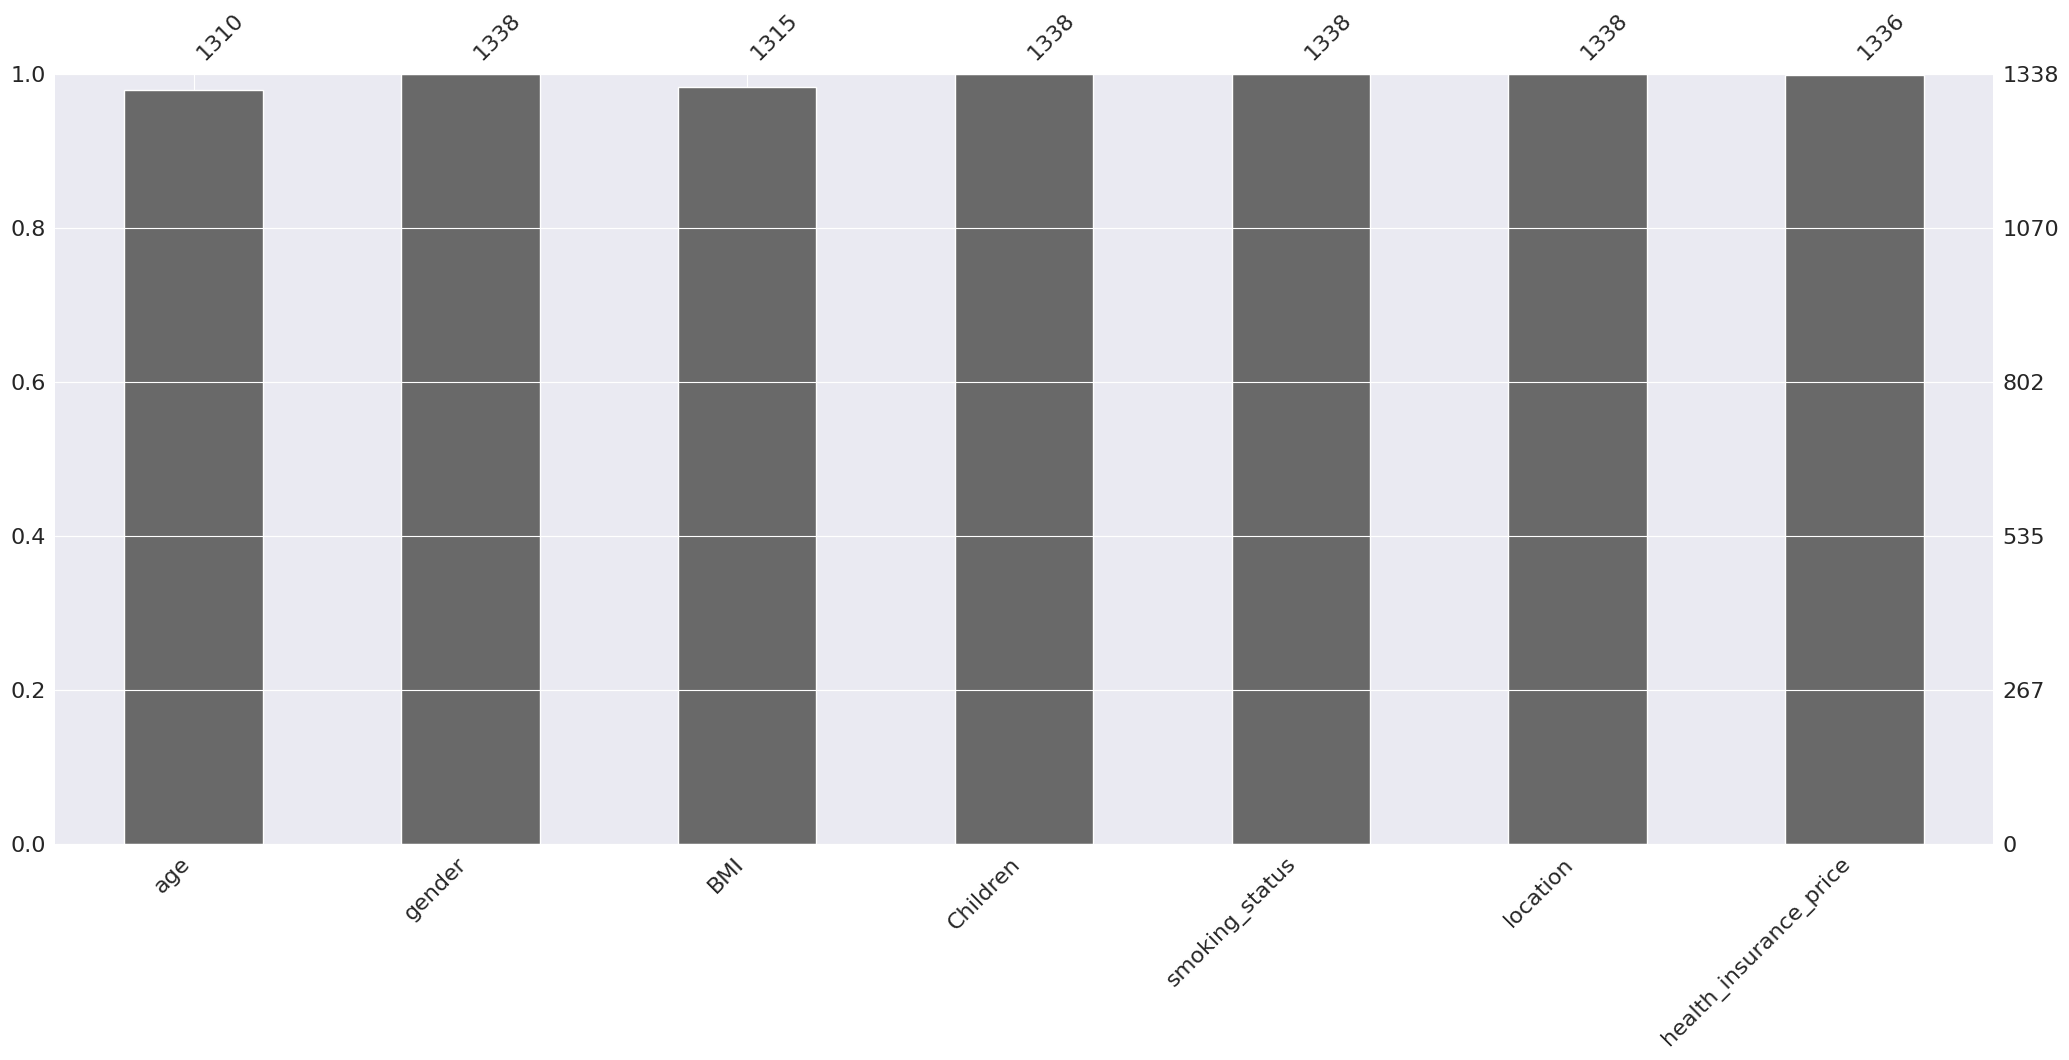

In [ ]:
# bar plot of missing values

plt.figure(figsize=(5,5))
msno.bar(dataset)
plt.show()

<Axes: >

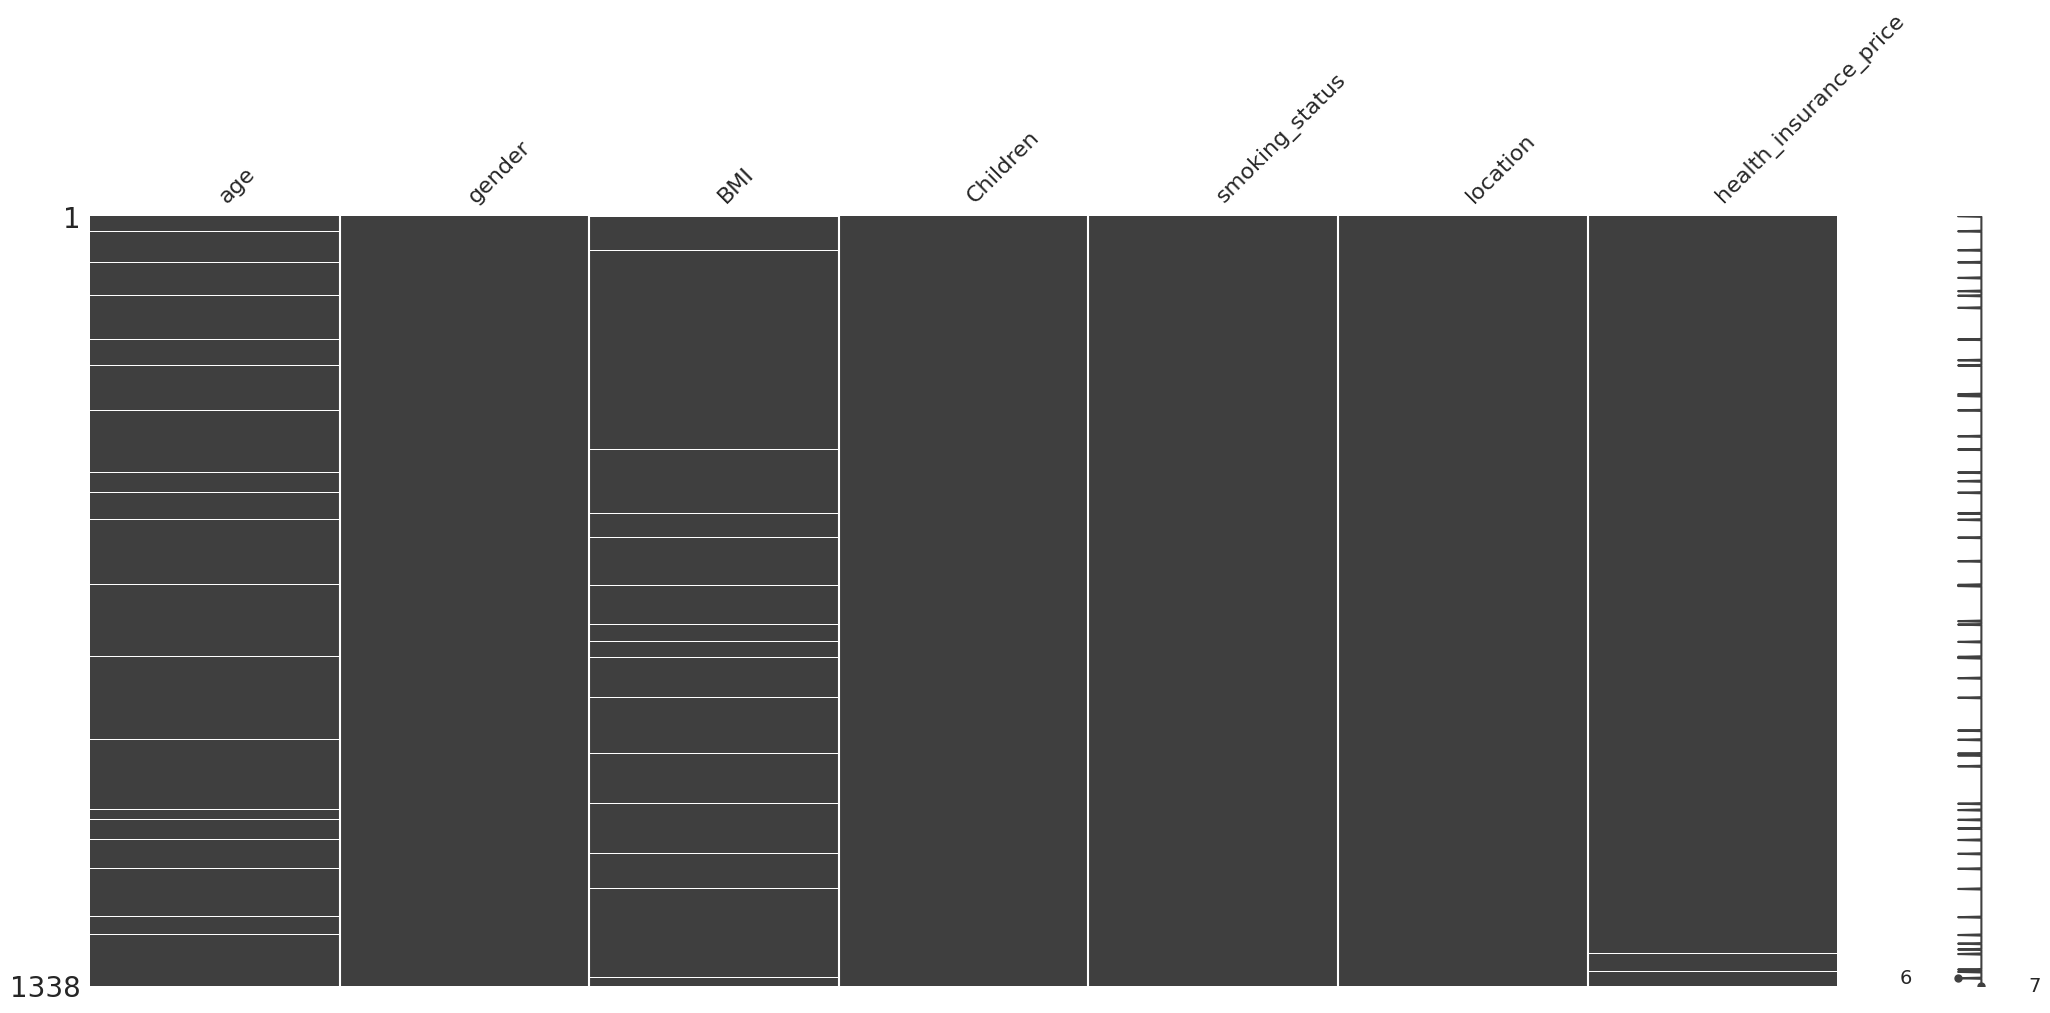

In [ ]:
# finding the pattern of the missing values

msno.matrix(dataset)

<Axes: >

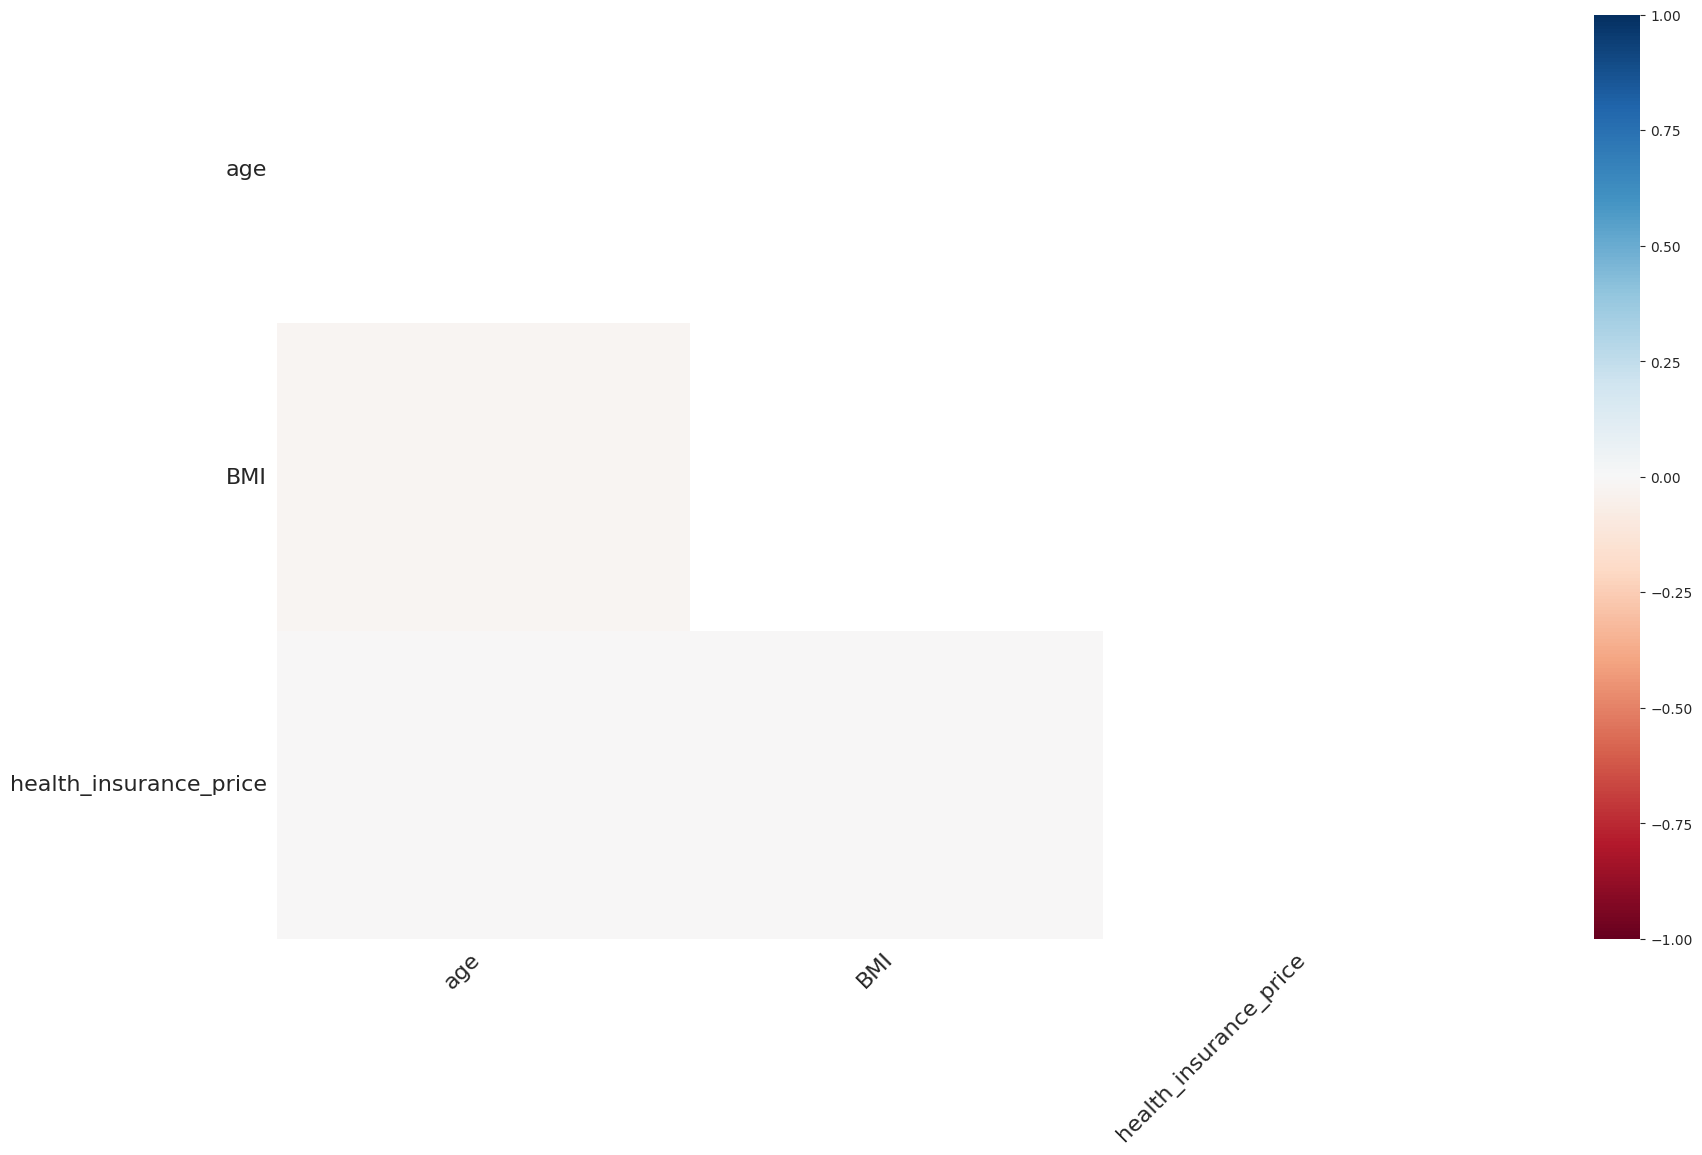

In [ ]:
# looking for any correlation between the missing values

msno.heatmap(dataset)

* From the heatmap of missing numbers, we can see that there is no relationship between the missing values.
* Hence, it is proved that the missing values are completely at random **(MCAR)**

## Dealing with the missing values

In [201]:
# Since the missing values are at random, we can drop the rows having missing values in dependent variable

dataset.drop(dataset[dataset['health_insurance_price'].isnull()].index, axis = 0, inplace = True)

In [202]:
dataset.isnull().sum()

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     0
dtype: int64

* To avoid changes in the dependent variable as we impute the missing values in independent variables, I am dividing the dataset into independent and dependent variables.

In [203]:
IDV = dataset.iloc[:,:6]
DV = dataset.iloc[:,-1]

In [204]:
IDV.head()     # independent variables

,age,gender,BMI,Children,smoking_status,location
0,19.0,0,NaN,0,1,3
1,18.0,1,33.770,1,0,2
2,28.0,1,33.000,3,0,2
3,33.0,1,22.705,0,0,1
4,32.0,1,28.880,0,0,1


In [ ]:
DV.head()     # dependent variable

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: health_insurance_price, dtype: float64

## Imputing the missing values

### Mean imputation

In [ ]:
# mean imputation

from sklearn.impute import SimpleImputer

IDV_mean = IDV.copy(deep=True)

mean_imputer = SimpleImputer(strategy='mean')

IDV_mean.iloc[:, :] = mean_imputer.fit_transform(IDV_mean)

<ipython-input-73-c66de630fb6b>:9: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



### Median imputation

In [ ]:
# median imputation

IDV_median = IDV.copy(deep=True)

median_imputer = SimpleImputer(strategy='mean')

IDV_median.iloc[:, :] = median_imputer.fit_transform(IDV_median)

<ipython-input-74-25d45827fe29>:7: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



### Mode imputation

In [ ]:
# mode imputation

IDV_mode = IDV.copy(deep=True)

mode_imputer = SimpleImputer(strategy='most_frequent')

IDV_mode.iloc[:, :] = mode_imputer.fit_transform(IDV_mode)

<ipython-input-75-53d0eb6e8077>:7: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



In [ ]:
!pip install fancyimpute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 13.4 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29880 sha256=ee5000d8e1df7409ab774609330aa2f5d9bf97dcf0830599c04821a5940157ea
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11335 sha256=aac3595f9aab674519090d7c71f94ad812e585b6674a85c6150791521f740128
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


### KNN imputation

In [205]:
# knn imputation

from fancyimpute import KNN

knn_imputer = KNN()

IDV_knn = IDV.copy(deep=True)

IDV_knn.iloc[:, :] = knn_imputer.fit_transform(IDV_knn)

Imputing row 1/1336 with 1 missing, elapsed time: 0.274
Imputing row 101/1336 with 0 missing, elapsed time: 0.275
Imputing row 201/1336 with 0 missing, elapsed time: 0.276
Imputing row 301/1336 with 0 missing, elapsed time: 0.277
Imputing row 401/1336 with 0 missing, elapsed time: 0.278
Imputing row 501/1336 with 0 missing, elapsed time: 0.279
Imputing row 601/1336 with 0 missing, elapsed time: 0.280
Imputing row 701/1336 with 0 missing, elapsed time: 0.281
Imputing row 801/1336 with 0 missing, elapsed time: 0.282
Imputing row 901/1336 with 0 missing, elapsed time: 0.283
Imputing row 1001/1336 with 0 missing, elapsed time: 0.284
Imputing row 1101/1336 with 0 missing, elapsed time: 0.285
Imputing row 1201/1336 with 0 missing, elapsed time: 0.286
Imputing row 1301/1336 with 0 missing, elapsed time: 0.287


<ipython-input-205-27fca050c68b>:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  IDV_knn.iloc[:, :] = knn_imputer.fit_transform(IDV_knn)


### MICE imputation

In [ ]:
# mice imputation

from fancyimpute import IterativeImputer

MICE_imputer = IterativeImputer()

IDV_MICE = IDV.copy(deep=True)

IDV_MICE.iloc[:, :] = MICE_imputer.fit_transform(IDV_MICE)

<ipython-input-15-80229649658f>:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  IDV_MICE.iloc[:, :] = MICE_imputer.fit_transform(IDV_MICE)


## Visualizing the imputation methods

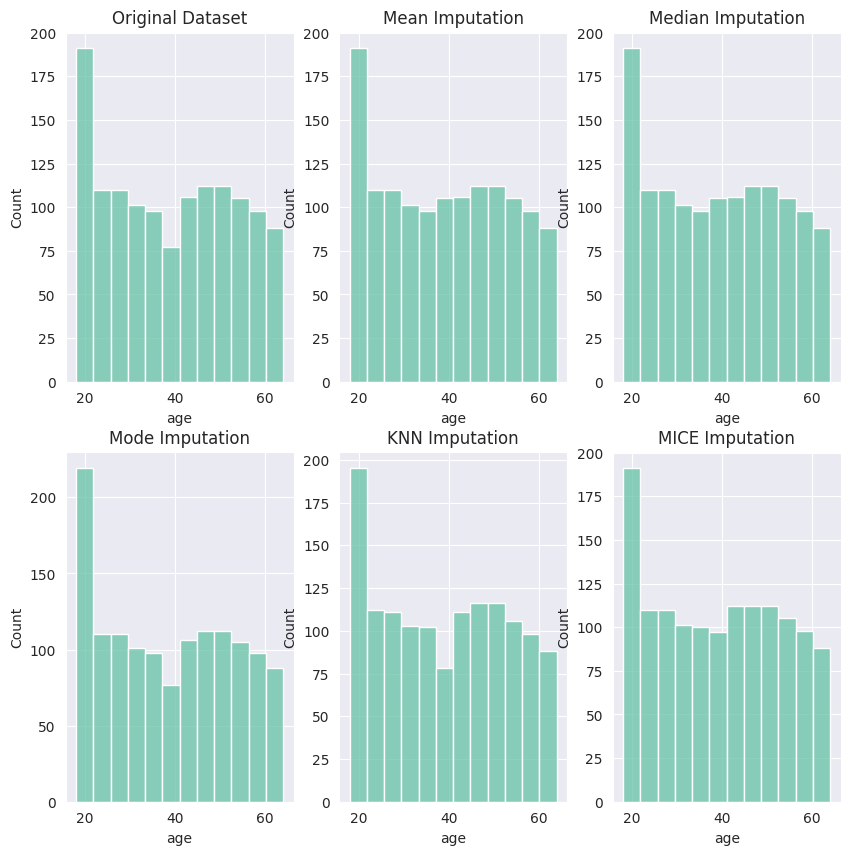

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize=(10,10))
sns.histplot(dataset['age'], ax = ax[0][0])
ax[0][0].set_title('Original Dataset')
sns.histplot(IDV_mean['age'], ax = ax[0][1])
ax[0][1].set_title('Mean Imputation')
sns.histplot(IDV_median['age'], ax = ax[0][2])
ax[0][2].set_title('Median Imputation')
sns.histplot(IDV_mode['age'], ax = ax[1][0])
ax[1][0].set_title('Mode Imputation')
sns.histplot(IDV_knn['age'], ax = ax[1][1])
ax[1][1].set_title('KNN Imputation')
sns.histplot(IDV_MICE['age'], ax = ax[1][2])
ax[1][2].set_title('MICE Imputation')
plt.show()

**Observation :**

 * Observing the imputations in **age** column.

 * From the above plots, we can see that both **Mode imputation** and **KNN imputation** has performed well as compared to other methods.

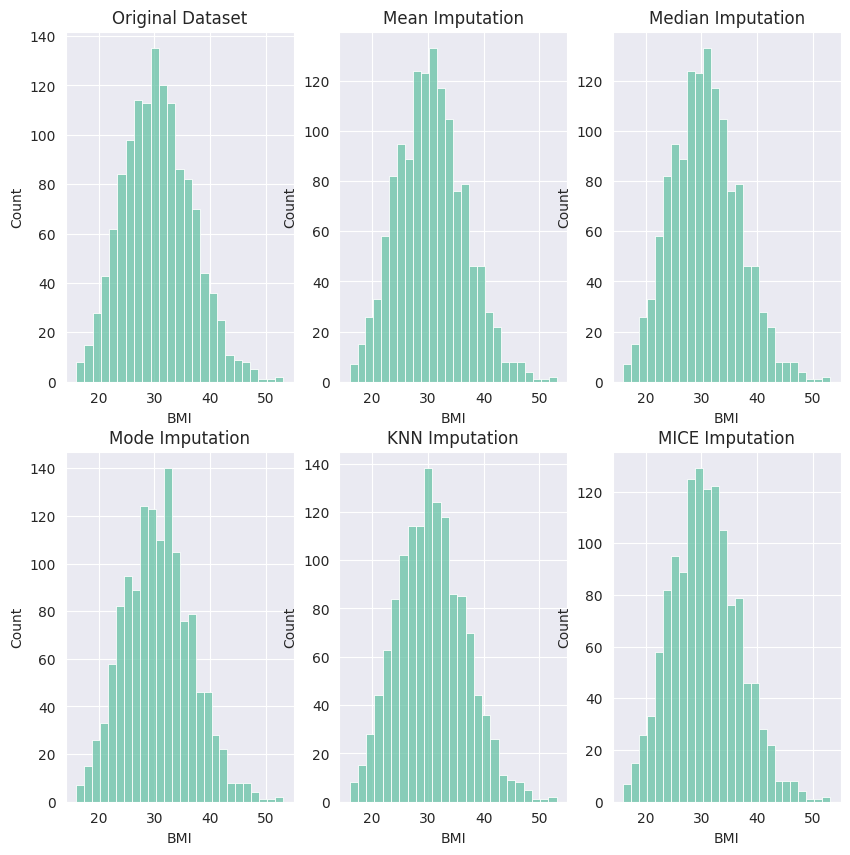

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize=(10,10))
sns.histplot(dataset['BMI'], ax = ax[0][0])
ax[0][0].set_title('Original Dataset')
sns.histplot(IDV_mean['BMI'], ax = ax[0][1])
ax[0][1].set_title('Mean Imputation')
sns.histplot(IDV_median['BMI'], ax = ax[0][2])
ax[0][2].set_title('Median Imputation')
sns.histplot(IDV_mode['BMI'], ax = ax[1][0])
ax[1][0].set_title('Mode Imputation')
sns.histplot(IDV_knn['BMI'], ax = ax[1][1])
ax[1][1].set_title('KNN Imputation')
sns.histplot(IDV_MICE['BMI'], ax = ax[1][2])
ax[1][2].set_title('MICE Imputation')
plt.show()

**Observation :**

 * Observing the imputations in **BMI** column.

 * From the above plots, we can see that **KNN imputation** has performed well as compared to other methods.

In [ ]:
dataset.describe(include = 'all')

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
count,1308.000000,1336.00000,1313.000000,1336.0,1336.000000,1336.000000,1336.000000
unique,NaN,NaN,NaN,6.0,NaN,NaN,NaN
top,NaN,NaN,NaN,0.0,NaN,NaN,NaN
freq,NaN,NaN,NaN,574.0,NaN,NaN,NaN
mean,39.164373,0.50524,30.631158,NaN,0.204341,1.514970,13268.527719
std,14.063732,0.50016,6.105017,NaN,0.403370,1.104875,12112.797724
min,18.000000,0.00000,15.960000,NaN,0.000000,0.000000,1121.873900
25%,26.000000,0.00000,26.200000,NaN,0.000000,1.000000,4744.325050
50%,39.000000,1.00000,30.305000,NaN,0.000000,2.000000,9382.033000
75%,51.000000,1.00000,34.580000,NaN,0.000000,2.000000,16604.302645


In [ ]:
IDV_mean.describe(include = 'all')

,age,gender,BMI,Children,smoking_status,location
count,1336.000000,1336.00000,1336.000000,1336.000000,1336.000000,1336.000000
mean,39.164373,0.50524,30.631158,1.094311,0.204341,1.514970
std,13.915466,0.50016,6.052198,1.206138,0.403370,1.104875
min,18.000000,0.00000,15.960000,0.000000,0.000000,0.000000
25%,27.000000,0.00000,26.315000,0.000000,0.000000,1.000000
50%,39.164373,1.00000,30.495000,1.000000,0.000000,2.000000
75%,51.000000,1.00000,34.430000,2.000000,0.000000,2.000000
max,64.000000,1.00000,53.130000,5.000000,1.000000,3.000000


In [ ]:
IDV_median.describe(include = 'all')

,age,gender,BMI,Children,smoking_status,location
count,1336.000000,1336.00000,1336.000000,1336.000000,1336.000000,1336.000000
mean,39.164373,0.50524,30.631158,1.094311,0.204341,1.514970
std,13.915466,0.50016,6.052198,1.206138,0.403370,1.104875
min,18.000000,0.00000,15.960000,0.000000,0.000000,0.000000
25%,27.000000,0.00000,26.315000,0.000000,0.000000,1.000000
50%,39.164373,1.00000,30.495000,1.000000,0.000000,2.000000
75%,51.000000,1.00000,34.430000,2.000000,0.000000,2.000000
max,64.000000,1.00000,53.130000,5.000000,1.000000,3.000000


In [ ]:
IDV_mode.describe(include = 'all')

,age,gender,BMI,Children,smoking_status,location
count,1336.000000,1336.00000,1336.000000,1336.000000,1336.000000,1336.000000
mean,38.720808,0.50524,30.659888,1.094311,0.204341,1.514970
std,14.242124,0.50016,6.056093,1.206138,0.403370,1.104875
min,18.000000,0.00000,15.960000,0.000000,0.000000,0.000000
25%,26.000000,0.00000,26.315000,0.000000,0.000000,1.000000
50%,39.000000,1.00000,30.495000,1.000000,0.000000,2.000000
75%,51.000000,1.00000,34.430000,2.000000,0.000000,2.000000
max,64.000000,1.00000,53.130000,5.000000,1.000000,3.000000


In [ ]:
IDV_knn.describe(include = 'all')

,age,gender,BMI,Children,smoking_status,location
count,1336.000000,1336.00000,1336.000000,1336.000000,1336.000000,1336.000000
mean,39.134418,0.50524,30.631464,1.094311,0.204341,1.514970
std,14.011080,0.50016,6.080546,1.206138,0.403370,1.104875
min,18.000000,0.00000,15.960000,0.000000,0.000000,0.000000
25%,26.000000,0.00000,26.200003,0.000000,0.000000,1.000000
50%,39.000000,1.00000,30.380000,1.000000,0.000000,2.000000
75%,51.000000,1.00000,34.488750,2.000000,0.000000,2.000000
max,64.000000,1.00000,53.130000,5.000000,1.000000,3.000000


In [ ]:
IDV_MICE.describe(include = 'all')

,age,gender,BMI,Children,smoking_status,location
count,1336.000000,1336.00000,1336.000000,1336.000000,1336.000000,1336.000000
mean,39.167466,0.50524,30.633462,1.094311,0.204341,1.514970
std,13.917334,0.50016,6.053449,1.206138,0.403370,1.104875
min,18.000000,0.00000,15.960000,0.000000,0.000000,0.000000
25%,27.000000,0.00000,26.315000,0.000000,0.000000,1.000000
50%,39.000000,1.00000,30.400000,1.000000,0.000000,2.000000
75%,51.000000,1.00000,34.430000,2.000000,0.000000,2.000000
max,64.000000,1.00000,53.130000,5.000000,1.000000,3.000000


* Apart from the plots, values like mean and standard deviation looks better in KNN imputation.
* Hence, I am moving ahead with KNN imputed values.

In [206]:
# concatenating the independent KNN imputed values and dependent variables

dataset = pd.concat([IDV_knn, DV], axis=1)

In [207]:
dataset.isnull().sum()

age                       0
gender                    0
BMI                       0
Children                  0
smoking_status            0
location                  0
health_insurance_price    0
dtype: int64

* We can see that all the missing values has been imputed and there are no null values.

# Outliers

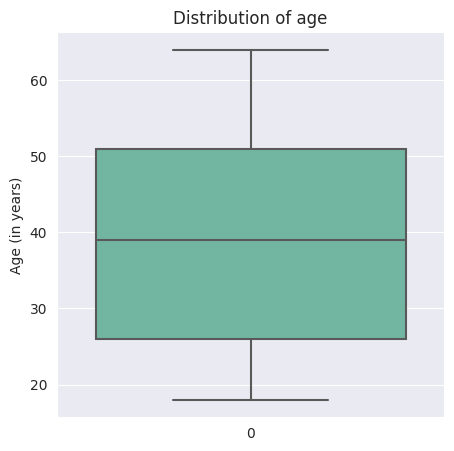

In [ ]:
plt.figure(figsize = (5,5))
sns.boxplot(data = dataset['age'])
plt.title('Distribution of age')
plt.ylabel('Age (in years)')
plt.show()

In [ ]:
# finding iqr

Q1 = np.percentile(dataset['age'], 25)
Q2 = np.percentile(dataset['age'], 50)
Q3 = np.percentile(dataset['age'], 75)

IQR = Q3 - Q1

print('IQR =', IQR)

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outlier = []

for x in dataset['age']:
  if x > upper_limit or x < lower_limit:
    outlier.append(x)

print('Outliers in the dataset are :', outlier)

IQR = 25.0
Outliers in the dataset are : []


**Observation :**

 * From the plot and the IQR observation, it is clear that there are no outliers in age column.

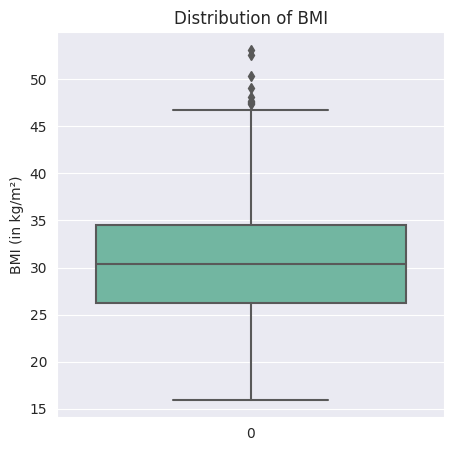

In [ ]:
plt.figure(figsize = (5,5))
sns.boxplot(data = dataset['BMI'])
plt.title('Distribution of BMI')
plt.ylabel('BMI (in kg/m²)')
plt.show()

In [ ]:
# finding iqr

Q1 = np.percentile(dataset['BMI'], 25)
Q2 = np.percentile(dataset['BMI'], 50)
Q3 = np.percentile(dataset['BMI'], 75)

IQR = Q3 - Q1

print('IQR =', IQR)

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outlier = []

for x in dataset['BMI']:
  if x > upper_limit or x < lower_limit:
    outlier.append(x)

print('Outliers in the dataset are :', outlier)

IQR = 8.288747468753161
Outliers in the dataset are : [49.06, 48.07, 47.52, 47.41, 50.38, 47.6, 52.58, 47.74, 53.13]


**Observation :**

 * The plot and the IQR obseravtions show that there are many outliers in the BMI column.
 * However the values in the outliers are very much higher than the ideal human body mass index.
 * The ideal range is :

| BMI range | Body type |
|   ---     |   ---     |
| < 18.5 kg/m² | lean  |
| between 18.5  and 25 kg/m² | normal  |
| between 25 and 29.9 kg/m²  | over-weight  |
| > 30 kg/m²  | Obese |

 * This shows that the BMI values may have entered incorrectly.
 * Therefore it is better to check for correlation of the variable with the dependent variable before dealing with the outliers.

## Checking for correlation

In [ ]:
dataset.corr(method = 'spearman')

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
age,1.000000,-0.022608,0.103957,0.058108,-0.027232,0.006499,0.520434
gender,-0.022608,1.000000,0.046632,0.016194,0.078228,0.003248,0.011057
BMI,0.103957,0.046632,1.000000,0.021522,0.004255,0.146584,0.118979
Children,0.058108,0.016194,0.021522,1.000000,0.015260,0.010786,0.132621
smoking_status,-0.027232,0.078228,0.004255,0.015260,1.000000,-0.000925,0.662938
location,0.006499,0.003248,0.146584,0.010786,-0.000925,1.000000,-0.042286
health_insurance_price,0.520434,0.011057,0.118979,0.132621,0.662938,-0.042286,1.000000


 * The correlation between **BMI** and **health_insurance_price** is **0.011057**.
 * This shows that BMI has no linear correlation with the insurance price.

## Checking for collinearity of variables

In [ ]:
# examining multicollinearity using VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = dataset.iloc[:,:6]

vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns

vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i)
                          for i in range(len(X_vif.columns))]

print(vif_data)

          feature        VIF
0             age   7.541796
1          gender   2.003401
2             BMI  10.338540
3        Children   1.802652
4  smoking_status   1.256935
5        location   2.914157


* We can see that the **age** and **BMI** columns are highly correlated.
* Let's check for collinearity after dropping the BMI column.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = dataset.drop(['BMI','health_insurance_price'], axis = 1)             # dropping the BMI column

vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns

vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i)
                          for i in range(len(X_vif.columns))]

print(vif_data)

          feature       VIF
0             age  3.385858
1          gender  1.869119
2        Children  1.749575
3  smoking_status  1.240559
4        location  2.469256


* Now we have optimal VIF value for all the columns.
* Therefore, we can drop the BMI column from the dataset.

In [208]:
dataset = dataset.drop(['BMI'], axis = 1)                         # dropping BMI column

In [209]:
dataset.columns

Index(['age', 'gender', 'Children', 'smoking_status', 'location',
       'health_insurance_price'],
      dtype='object')

# Splitting the dataset into Training set and Test set

In [ ]:
# selecting independent variables

X = dataset.iloc[:, :-1].values
X

array([[19.,  0.,  0.,  1.,  3.],
       [18.,  1.,  1.,  0.,  2.],
       [28.,  1.,  3.,  0.,  2.],
       ...,
       [18.,  0.,  0.,  0.,  2.],
       [21.,  0.,  0.,  0.,  3.],
       [61.,  0.,  0.,  1.,  1.]])

In [ ]:
# selecting dependent variables

y = dataset.iloc[:, -1].values
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [ ]:
# splitting the data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
X_train

array([[60.,  1.,  3.,  0.,  2.],
       [60.,  0.,  0.,  0.,  1.],
       [53.,  0.,  2.,  0.,  0.],
       ...,
       [51.,  0.,  2.,  1.,  0.],
       [40.,  0.,  2.,  1.,  2.],
       [57.,  1.,  1.,  0.,  2.]])

# Standardising the data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

In [ ]:
X_train

array([[ 1.48535382,  0.97960861,  1.59623768, -0.52534338,  0.42956678],
       [ 1.48535382, -1.02081585, -0.92687309, -0.52534338, -0.47531945],
       [ 0.98589984, -1.02081585,  0.75520076, -0.52534338, -1.38020568],
       ...,
       [ 0.8431987 , -1.02081585,  0.75520076,  1.90351691, -1.38020568],
       [ 0.05834244, -1.02081585,  0.75520076,  1.90351691,  0.42956678],
       [ 1.27130211,  0.97960861, -0.08583617, -0.52534338,  0.42956678]])

In [ ]:
X_test

array([[-1.44001952, -1.02081585, -0.08583617, -0.52534338, -0.47531945],
       [-0.01300813, -1.02081585,  3.27831152,  1.90351691,  1.33445301],
       [ 1.12860097, -1.02081585, -0.08583617, -0.52534338, -1.38020568],
       ...,
       [-1.44001952, -1.02081585,  1.59623768, -0.52534338, -0.47531945],
       [-1.51137009, -1.02081585, -0.92687309, -0.52534338, -1.38020568],
       [ 0.98589984, -1.02081585, -0.92687309, -0.52534338, -0.47531945]])

* Here I am using standard scaler to standardize the data.
* We can also use **MinMaxScaler** for normalisation of data.

# Machine Learning models

## Linear regression

In [ ]:
# predicting the train data

from sklearn.linear_model import LinearRegression
lm = LinearRegression()

lm.fit(X_train,y_train)

ypred_train_lin = lm.predict(X_train)

# importing and calculating the metrics for train data

from sklearn import metrics

MAE_train_lin = metrics.mean_absolute_error(y_train, ypred_train_lin)
MSE_train_lin = metrics.mean_squared_error(y_train, ypred_train_lin)
RMSE_train_lin = np.sqrt(metrics.mean_squared_error(y_train, ypred_train_lin))
r2_train_lin = metrics.r2_score(y_true = y_train, y_pred = ypred_train_lin)

# predicting the test data

ypred_test_lin = lm.predict(X_test)

# calculating the metrics for test data

MAE_test_lin = metrics.mean_absolute_error(y_test, ypred_test_lin)
MSE_test_lin = metrics.mean_squared_error(y_test, ypred_test_lin)
RMSE_test_lin = np.sqrt(metrics.mean_squared_error(y_test, ypred_test_lin))
r2_test_lin = metrics.r2_score(y_true = y_test, y_pred = ypred_test_lin)

# adjusted r-squared


N = X.shape[0]
p = 5
x = (1-r2_train_lin)
y = (N-1) / (N-p-1)
adj_rsquared_train_lin = (1 - (x * y))


N = X.shape[0]
p = 5
x = (1-r2_test_lin)
y = (N-1) / (N-p-1)
adj_rsquared_test_lin = (1 - (x * y))


print('Performance metrics of train data:')
print('MAE       :',round(MAE_train_lin,4))
print('MSE       :',round(MSE_train_lin,4))
print('RMSE      :',round(RMSE_train_lin,4))
print('R-squared :',round(r2_train_lin,4))
print('Adjusted R-squared :',round(adj_rsquared_train_lin,4))
print()
print('Performance metrics of test data:')
print('MAE       :',round(MAE_test_lin,4))
print('MSE       :',round(MSE_test_lin,4))
print('RMSE      :',round(RMSE_test_lin,4))
print('R-squared :',round(r2_test_lin,4))
print('Adjusted R-squared :',round(adj_rsquared_test_lin,4))

residuals_lin = y_train-ypred_train_lin
mean_residuals = np.mean(residuals_lin)
print("\nMean of Residuals of train data {}".format(mean_residuals))

Performance metrics of train data:
MAE       : 4178.2196
MSE       : 41774692.1548
RMSE      : 6463.3344
R-squared : 0.7247
Adjusted R-squared : 0.7237

Performance metrics of test data:
MAE       : 3913.6765
MSE       : 39271618.135
RMSE      : 6266.7071
R-squared : 0.6852
Adjusted R-squared : 0.6841

Mean of Residuals of train data -2.486633454285534e-13


In [ ]:
print('Coefficients: ', lm.coef_)

Coefficients:  [12550.54428433    90.68916978  2646.76569857 23878.58903488
   289.75703991]


In [ ]:
print('Intercept :',lm.intercept_)

Intercept : 13534.577378828651


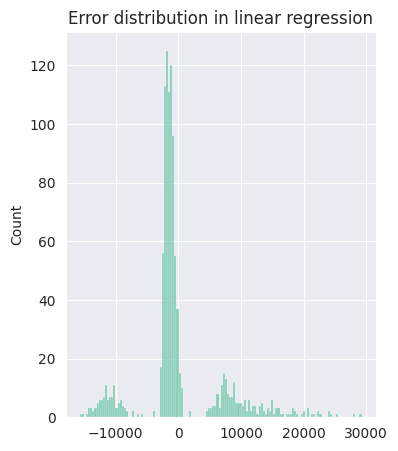

In [ ]:
plt.figure(figsize = (4,5))
sns.histplot(y_train-ypred_train_lin)
plt.title('Error distribution in linear regression')
plt.show()

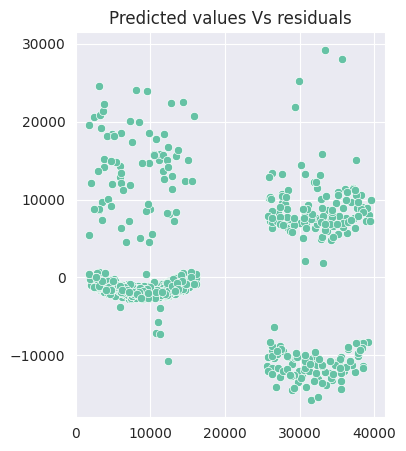

In [ ]:
plt.figure(figsize=(4,5))
sns.scatterplot(x = ypred_train_lin, y = residuals_lin)
plt.title('Predicted values Vs residuals')
plt.show()

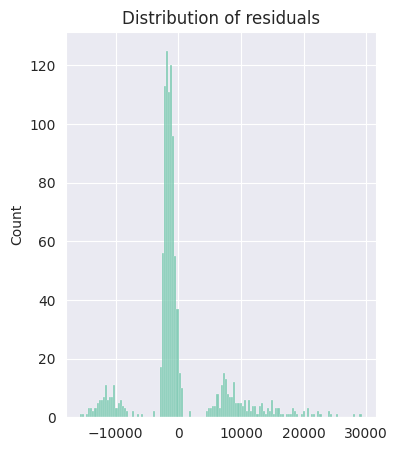

In [ ]:
plt.figure(figsize = (4,5))
sns.histplot(x = residuals_lin)
plt.title('Distribution of residuals')
plt.show()

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()

In [ ]:
from sklearn.model_selection import GridSearchCV

parameter_grid = {'max_depth' : [2,3,4,5,6,7,8]}

grid = GridSearchCV(DTR, parameter_grid, refit = True)

grid.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(max_depth=4),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8]})

In [ ]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'max_depth': 4}
DecisionTreeRegressor(max_depth=4)


In [ ]:
# predicting the train data

from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(max_depth = 4)

DTR.fit(X_train,y_train)

ypred_train_DTR = DTR.predict(X_train)

# calculating the metrics for train data

MAE_train_DTR = metrics.mean_absolute_error(y_train, ypred_train_DTR)
MSE_train_DTR = metrics.mean_squared_error(y_train, ypred_train_DTR)
RMSE_train_DTR = np.sqrt(metrics.mean_squared_error(y_train, ypred_train_DTR))
r2_train_DTR = metrics.r2_score(y_true = y_train, y_pred = ypred_train_DTR)

N = X.shape[0]
p = 5
x = (1-r2_train_DTR)
y = (N-1) / (N-p-1)
adj_rsquared_train_DTR = (1 - (x * y))

# predicting the test data

ypred_test_DTR = DTR.predict(X_test)


# calculating the metrics for test data

MAE_test_DTR = metrics.mean_absolute_error(y_test, ypred_test_DTR)
MSE_test_DTR = metrics.mean_squared_error(y_test, ypred_test_DTR)
RMSE_test_DTR = np.sqrt(metrics.mean_squared_error(y_test, ypred_test_DTR))
r2_test_DTR = metrics.r2_score(y_true = y_test, y_pred = ypred_test_DTR)


N = X.shape[0]
p = 5
x = (1-r2_test_DTR)
y = (N-1) / (N-p-1)
adj_rsquared_test_DTR = (1 - (x * y))

print('Performance metrics of train data:')
print('MAE       :',round(MAE_train_DTR,4))
print('MSE       :',round(MSE_train_DTR,4))
print('RMSE      :',round(RMSE_train_DTR,4))
print('R-squared :',round(r2_train_DTR,4))
print('Adjusted R-squared :',round(adj_rsquared_train_DTR,4))
print()
print('Performance metrics of test data:')
print('MAE       :',round(MAE_test_DTR,4))
print('MSE       :',round(MSE_test_DTR,4))
print('RMSE      :',round(RMSE_test_DTR,4))
print('R-squared :',round(r2_test_DTR,4))
print('Adjusted R-squared :',round(adj_rsquared_test_DTR,4))

residuals_DTR = y_train-ypred_train_DTR
mean_residuals = np.mean(residuals_DTR)
print("\nMean of Residuals of train data {}".format(mean_residuals))

Performance metrics of train data:
MAE       : 3963.9673
MSE       : 38019542.2543
RMSE      : 6165.9989
R-squared : 0.7494
Adjusted R-squared : 0.7485

Performance metrics of test data:
MAE       : 3969.3052
MSE       : 41190755.4428
RMSE      : 6418.0024
R-squared : 0.6699
Adjusted R-squared : 0.6686

Mean of Residuals of train data -1.1513453528061788e-12


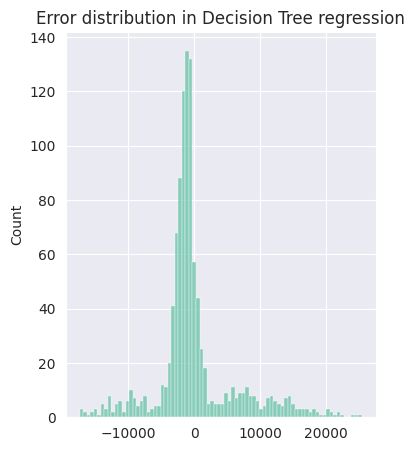

In [ ]:
plt.figure(figsize = (4,5))
sns.histplot(y_train-ypred_train_DTR)
plt.title('Error distribution in Decision Tree regression')
plt.show()

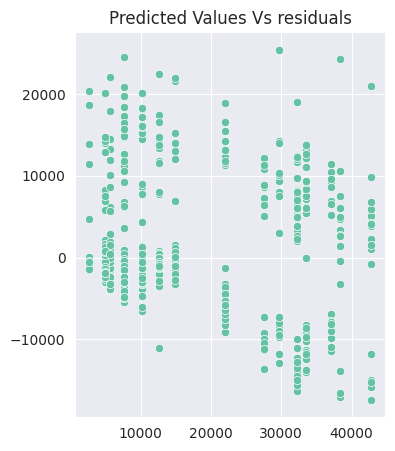

In [ ]:
plt.figure(figsize=(4,5))
sns.scatterplot(x = ypred_train_DTR, y = residuals_DTR)
plt.title('Predicted Values Vs residuals')
plt.show()

## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RFR= RandomForestRegressor()

RFR.fit(X_train, y_train)

y_pred= RFR.predict(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

parameter_grid = {'max_depth' : [2,3,4,5,6,7,8],
                  'n_estimators' : [50,100,150,200,250,300]}

grid = GridSearchCV(RFR, parameter_grid, refit = True)

grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [50, 100, 150, 200, 250, 300]})

In [ ]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'max_depth': 4, 'n_estimators': 100}
RandomForestRegressor(max_depth=4)


In [ ]:
# predicting the train data

from sklearn.ensemble import RandomForestRegressor
RFR= RandomForestRegressor(max_depth = 4, n_estimators = 100)

RFR.fit(X_train,y_train)

ypred_train_RFR = RFR.predict(X_train)

# calculating the metrics for train data

MAE_train_RFR = metrics.mean_absolute_error(y_train, ypred_train_RFR)
MSE_train_RFR = metrics.mean_squared_error(y_train, ypred_train_RFR)
RMSE_train_RFR = np.sqrt(metrics.mean_squared_error(y_train, ypred_train_RFR))
r2_train_RFR = metrics.r2_score(y_true = y_train, y_pred = ypred_train_RFR)

N = X.shape[0]
p = 5
x = (1-r2_train_RFR)
y = (N-1) / (N-p-1)
adj_rsquared_train_RFR = (1 - (x * y))

# predicting the test data

ypred_test_RFR = RFR.predict(X_test)


# calculating the metrics for test data

MAE_test_RFR = metrics.mean_absolute_error(y_test, ypred_test_RFR)
MSE_test_RFR = metrics.mean_squared_error(y_test, ypred_test_RFR)
RMSE_test_RFR = np.sqrt(metrics.mean_squared_error(y_test, ypred_test_RFR))
r2_test_RFR = metrics.r2_score(y_true = y_test, y_pred = ypred_test_RFR)


N = X.shape[0]
p = 5
x = (1-r2_test_RFR)
y = (N-1) / (N-p-1)
adj_rsquared_test_RFR = (1 - (x * y))

print('Performance metrics of train data:')
print('MAE       :',round(MAE_train_RFR,4))
print('MSE       :',round(MSE_train_RFR,4))
print('RMSE      :',round(RMSE_train_RFR,4))
print('R-squared :',round(r2_train_RFR,4))
print('Adjusted R-squared :',round(adj_rsquared_train_RFR,4))
print()
print('Performance metrics of test data:')
print('MAE       :',round(MAE_test_RFR,4))
print('MSE       :',round(MSE_test_RFR,4))
print('RMSE      :',round(RMSE_test_RFR,4))
print('R-squared :',round(r2_test_RFR,4))
print('Adjusted R-squared :',round(adj_rsquared_test_RFR,4))

residuals_RFR = y_train-ypred_train_RFR
mean_residuals = np.mean(residuals_RFR)
print("\nMean of Residuals of train data {}".format(mean_residuals))

Performance metrics of train data:
MAE       : 3824.3238
MSE       : 35932221.6993
RMSE      : 5994.3491
R-squared : 0.7632
Adjusted R-squared : 0.7623

Performance metrics of test data:
MAE       : 3991.9916
MSE       : 42242175.3658
RMSE      : 6499.3981
R-squared : 0.6614
Adjusted R-squared : 0.6602

Mean of Residuals of train data 25.982307274057106


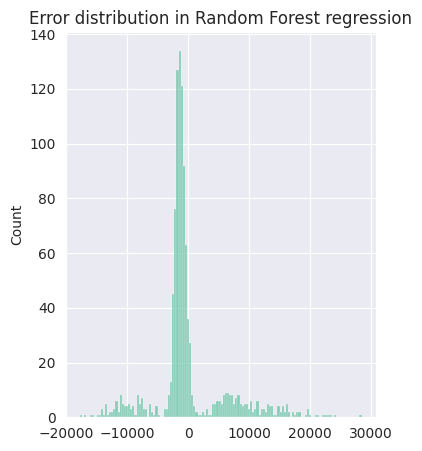

In [ ]:
plt.figure(figsize = (4,5))
sns.histplot(y_train-ypred_train_RFR)
plt.title('Error distribution in Random Forest regression')
plt.show()

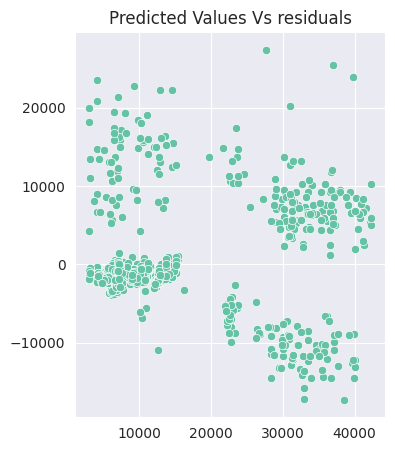

In [ ]:
plt.figure(figsize=(4,5))
sns.scatterplot(x = ypred_train_RFR, y = residuals_RFR)
plt.title('Predicted Values Vs residuals')
plt.show()

## XG Boost Regressor

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor()

In [ ]:
from sklearn.model_selection import GridSearchCV

parameter_grid = {'max_depth' : [2,3,4,5,6,7,8],
                  'n_estimators' : [10,20,30,40,50],
                  'learning_rate' : [0.1,0.2,0.3,0.4,0.5]}

grid = GridSearchCV(xgb, parameter_grid, refit = True)

grid.fit(X_train,y_train)

# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50}
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=50, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


In [ ]:
# predicting the train data

from xgboost import XGBRegressor

xgb = XGBRegressor(max_depth = 2, learning_rate = 0.1, n_estimators = 50)

xgb.fit(X_train,y_train)

ypred_train_xgb = xgb.predict(X_train)

# calculating the metrics for train data

MAE_train_xgb = metrics.mean_absolute_error(y_train, ypred_train_xgb)
MSE_train_xgb = metrics.mean_squared_error(y_train, ypred_train_xgb)
RMSE_train_xgb = np.sqrt(metrics.mean_squared_error(y_train, ypred_train_xgb))
r2_train_xgb = metrics.r2_score(y_true = y_train, y_pred = ypred_train_xgb)

N = X.shape[0]
p = 5
x = (1-r2_train_xgb)
y = (N-1) / (N-p-1)
adj_rsquared_train_xgb = (1 - (x * y))

# predicting the test data

ypred_test_xgb = xgb.predict(X_test)


# calculating the metrics for test data

MAE_test_xgb = metrics.mean_absolute_error(y_test, ypred_test_xgb)
MSE_test_xgb = metrics.mean_squared_error(y_test, ypred_test_xgb)
RMSE_test_xgb = np.sqrt(metrics.mean_squared_error(y_test, ypred_test_xgb))
r2_test_xgb = metrics.r2_score(y_true = y_test, y_pred = ypred_test_xgb)


N = X.shape[0]
p = 5
x = (1-r2_test_xgb)
y = (N-1) / (N-p-1)
adj_rsquared_test_xgb = (1 - (x * y))

print('Performance metrics of train data:')
print('MAE       :',round(MAE_train_xgb,4))
print('MSE       :',round(MSE_train_xgb,4))
print('RMSE      :',round(RMSE_train_xgb,4))
print('R-squared :',round(r2_train_xgb,4))
print('Adjusted R-squared :',round(adj_rsquared_train_xgb,4))
print()
print('Performance metrics of test data:')
print('MAE       :',round(MAE_test_xgb,4))
print('MSE       :',round(MSE_test_xgb,4))
print('RMSE      :',round(RMSE_test_xgb,4))
print('R-squared :',round(r2_test_xgb,4))
print('Adjusted R-squared :',round(adj_rsquared_test_xgb,4))

residuals_xgb = y_train-ypred_train_xgb
mean_residuals = np.mean(residuals_xgb)
print("\nMean of Residuals of train data {}".format(mean_residuals))

Performance metrics of train data:
MAE       : 4003.2288
MSE       : 38169400.157
RMSE      : 6178.1389
R-squared : 0.7485
Adjusted R-squared : 0.7475

Performance metrics of test data:
MAE       : 4009.9621
MSE       : 41101807.5908
RMSE      : 6411.0691
R-squared : 0.6706
Adjusted R-squared : 0.6693

Mean of Residuals of train data 74.83351480492159


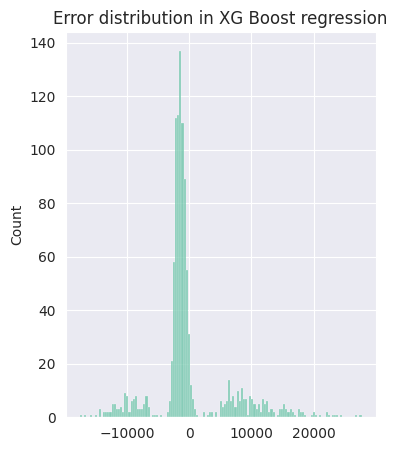

In [ ]:
plt.figure(figsize = (4,5))
sns.histplot(y_train-ypred_train_xgb)
plt.title('Error distribution in XG Boost regression')
plt.show()

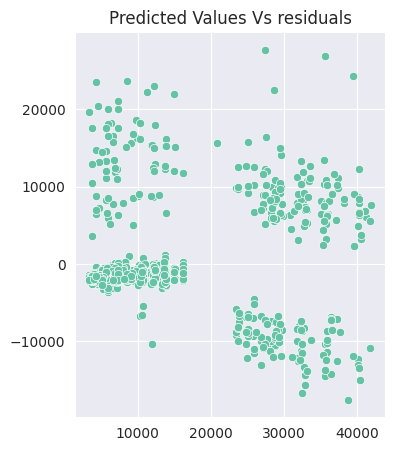

In [ ]:
plt.figure(figsize=(4,5))
sns.scatterplot(x = ypred_train_xgb, y = residuals_xgb)
plt.title('Predicted Values Vs residuals')
plt.show()

## Support Vector Machine

In [ ]:
from sklearn import svm

svr = svm.SVR()

In [ ]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'linear']}

grid = GridSearchCV(svm.SVR(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, y_train)

# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.077 total time=   0.1s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.160 total time=   0.1s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.162 total time=   0.1s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.096 total time=   0.1s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.072 total time=   0.1s
[CV 1/5] END ....C=0.1, gamma=1, kernel=linear;, score=-0.118 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=linear;, score=-0.213 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=1, kernel=linear;, score=-0.232 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=1, kernel=linear;, score=-0.180 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=1, kernel=linear;, score=-0.082 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.077 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;

In [ ]:
# predicting the train data

from sklearn import svm

svr = svm.SVR(C = 1000, gamma = 1, kernel = 'linear')

svr.fit(X_train,y_train)

ypred_train_svr = svr.predict(X_train)

# calculating the metrics for train data

MAE_train_svr = metrics.mean_absolute_error(y_train, ypred_train_svr)
MSE_train_svr = metrics.mean_squared_error(y_train, ypred_train_svr)
RMSE_train_svr = np.sqrt(metrics.mean_squared_error(y_train, ypred_train_svr))
r2_train_svr = metrics.r2_score(y_true = y_train, y_pred = ypred_train_svr)

N = X.shape[0]
p = 5
x = (1-r2_train_svr)
y = (N-1) / (N-p-1)
adj_rsquared_train_svr = (1 - (x * y))

# predicting the test data

ypred_test_svr = svr.predict(X_test)


# calculating the metrics for test data

MAE_test_svr = metrics.mean_absolute_error(y_test, ypred_test_svr)
MSE_test_svr = metrics.mean_squared_error(y_test, ypred_test_svr)
RMSE_test_svr = np.sqrt(metrics.mean_squared_error(y_test, ypred_test_svr))
r2_test_svr = metrics.r2_score(y_true = y_test, y_pred = ypred_test_svr)


N = X.shape[0]
p = 5
x = (1-r2_test_svr)
y = (N-1) / (N-p-1)
adj_rsquared_test_svr = (1 - (x * y))

print('Performance metrics of train data:')
print('MAE       :',round(MAE_train_svr,4))
print('MSE       :',round(MSE_train_svr,4))
print('RMSE      :',round(RMSE_train_svr,4))
print('R-squared :',round(r2_train_svr,4))
print('Adjusted R-squared :',round(adj_rsquared_train_svr,4))
print()
print('Performance metrics of test data:')
print('MAE       :',round(MAE_test_svr,4))
print('MSE       :',round(MSE_test_svr,4))
print('RMSE      :',round(RMSE_test_svr,4))
print('R-squared :',round(r2_test_svr,4))
print('Adjusted R-squared :',round(adj_rsquared_test_svr,4))

residuals_svr = y_train-ypred_train_svr
mean_residuals = np.mean(residuals_svr)
print("\nMean of Residuals of train data {}".format(mean_residuals))

Performance metrics of train data:
MAE       : 3644.0543
MSE       : 43429007.9083
RMSE      : 6590.0689
R-squared : 0.7138
Adjusted R-squared : 0.7127

Performance metrics of test data:
MAE       : 3348.7669
MSE       : 40645121.2508
RMSE      : 6375.3526
R-squared : 0.6742
Adjusted R-squared : 0.673

Mean of Residuals of train data 1129.5916896034635


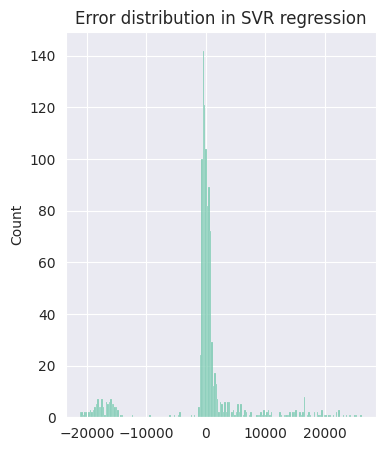

In [ ]:
plt.figure(figsize = (4,5))
sns.histplot(y_train-ypred_train_svr)
plt.title('Error distribution in SVR regression')
plt.show()

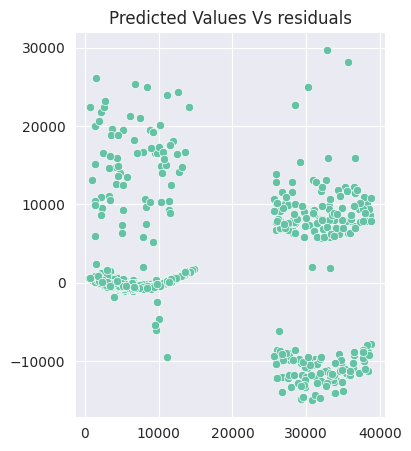

In [ ]:
plt.figure(figsize=(4,5))
sns.scatterplot(x = ypred_train_svr, y = residuals_svr)
plt.title('Predicted Values Vs residuals')
plt.show()

# Conclusion:

 - I have tried on 5 different models for regression and obtained the performance metrics on all the 5 models.
 - I have used Grid search cross validation with different parameter values for Decision tree, Random forest, XG Boost and Support vector Machine.
 - On the basis of adjusted r-squared value, we can see that all the 5 models worked well. Support vector machine regressor gets r-squared value of 0.6 while all other models have 0.7 .
 - When it comes to homoscedasticity, the residuals are not evenly distributed and it forms few straight line patterns for Decision tree model, which is not an advisable.
 - Comparing all other metrics linear regression model is best suited for this dataset.